In [1]:
# Three Observations:
# Observation 1: Southern Hemisphere climates tend to be slightly milder than those 
# at similar latitudes in the Northern Hemisphere. This is because the Southern
# Hemisphere has significantly more ocean and much less land; water heats up and cools down more slowly than land.

# Observation 2: Highest temperature is found at 0 latitude and as the latidude increases or decreases, \
# temperature drops. This happens as equatorial region receives sunlight straight with less 
# or no angle due to curvature shape of earth.

# Observation 3: Latitude doesn't have a strong iinfluence on wind speed. The speed of the wind is controlled 
# by the strength of the air pressure gradient, the stronger the pressure gradient the higher the wind speed.

In [2]:
#Import all necessary Libraries
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from citipy import citipy
import numpy as np
import pandas as pd
# Weather API Key
from config import api_key
import scipy.stats as st

# Output File (CSV)
output_data_file = "cities.csv"

In [3]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#WeatherPy
# In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API,
# and a little common sense to create a representative model of weather across world cities.

#Step 1: Get range of longitude and latitude.
#Latitudes range from -90 to 90, and longitudes range from -180 to 180
#generate random list for latitudes and longitudes 

latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,1500):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,1500):
    longitude.append(each_lon)

    
#Create and variable called latitude_and_Longitude and store all random latitudes and longitudes generated

latitude_and_Longitude = tuple(zip(latitude,longitude))


In [4]:
#use citipy library to find the nearest city for all latitudes and longitudes

cities = []
country = []

for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
  

    # Replace spaces with %20 to create url correctly 
    #city = city.replace(" ", "%20")
    cityName = city.city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(cityName)
        
        country.append(city.country_code)

# Print the city count to confirm sufficient count
len(cities)
    
print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))

The above script has generated 627 different cities using random numbers.


In [5]:
#create a dataframe to store all the cities and countries generated with citipy

df_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

#add additional blank columns to store information from openweathermap api

df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''

#drop all duplicates in column Cities.

df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')
df_countries

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,hobart,au,,,,,,
1,port augusta,au,,,,,,
2,bluff,nz,,,,,,
3,kapaa,us,,,,,,
4,kedrovyy,ru,,,,,,
...,...,...,...,...,...,...,...,...
1483,musoma,tz,,,,,,
1486,flagstaff,us,,,,,,
1487,saleaula,ws,,,,,,
1488,sumbawa,id,,,,,,


In [6]:
#loop through all rows and fill in values for blank columns in dataframe
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).


for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    
    #api call for all Cities 
    api_url = "http://api.openweathermap.org/data/2.5/weather" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,api_key)
    
    print(api_url)
    
    country_info = requests.get(api_url).json()
    
    #print all api url's for each city
    #Processing Record 21 of Set 2 | isangel
    print("Processing Record", index, "City Name: ", city_name)
    
    
    try:
        df_countries.set_value(index,'Latitude',country_info['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['main']['temp_max'])
        df_countries.set_value(index,'Humidity (%)',country_info['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')
    
  #  if index == 5:
  #      break

http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 0 City Name:  hobart
http://api.openweathermap.org/data/2.5/weather?q=port augusta,au&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2


/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_l

Processing Record 1 City Name:  port augusta
http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 2 City Name:  bluff
http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 3 City Name:  kapaa
http://api.openweathermap.org/data/2.5/weather?q=kedrovyy,ru&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 4 City Name:  kedrovyy
http://api.openweathermap.org/data/2.5/weather?q=bolshiye uki,ru&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 5 City Name:  bolshiye uki
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=chokurdakh,ru&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2


/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_l

Processing Record 6 City Name:  chokurdakh
http://api.openweathermap.org/data/2.5/weather?q=pisco,pe&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 7 City Name:  pisco
http://api.openweathermap.org/data/2.5/weather?q=lompoc,us&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 8 City Name:  lompoc
http://api.openweathermap.org/data/2.5/weather?q=desaguadero,pe&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 9 City Name:  desaguadero
http://api.openweathermap.org/data/2.5/weather?q=belushya guba,ru&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 10 City Name:  belushya guba
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk,ru&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 11 City Name:  severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&units=IMPE

Processing Record 63 City Name:  sechura
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 67 City Name:  busselton
http://api.openweathermap.org/data/2.5/weather?q=rawson,ar&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 68 City Name:  rawson
http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 70 City Name:  cape town
http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 71 City Name:  barrow
http://api.openweathermap.org/data/2.5/weather?q=aksarka,ru&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 74 City Name:  aksarka
http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processi

Processing Record 154 City Name:  tual
http://api.openweathermap.org/data/2.5/weather?q=puerto montt,cl&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 163 City Name:  puerto montt
http://api.openweathermap.org/data/2.5/weather?q=jardim,br&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 164 City Name:  jardim
http://api.openweathermap.org/data/2.5/weather?q=bengkulu,id&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 166 City Name:  bengkulu
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 168 City Name:  puerto ayora
http://api.openweathermap.org/data/2.5/weather?q=shakawe,bw&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 169 City Name:  shakawe
http://api.openweathermap.org/data/2.5/weather?q=miri,my&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963

Processing Record 264 City Name:  hilo
http://api.openweathermap.org/data/2.5/weather?q=port arthur,us&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 266 City Name:  port arthur
http://api.openweathermap.org/data/2.5/weather?q=iqaluit,ca&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 267 City Name:  iqaluit
http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 269 City Name:  torbay
http://api.openweathermap.org/data/2.5/weather?q=inirida,co&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 271 City Name:  inirida
http://api.openweathermap.org/data/2.5/weather?q=tilichiki,ru&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 274 City Name:  tilichiki
http://api.openweathermap.org/data/2.5/weather?q=thayetmyo,mm&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc62

Processing Record 369 City Name:  guerrero negro
http://api.openweathermap.org/data/2.5/weather?q=kysyl-syr,ru&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 370 City Name:  kysyl-syr
http://api.openweathermap.org/data/2.5/weather?q=general pico,ar&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 373 City Name:  general pico
http://api.openweathermap.org/data/2.5/weather?q=avera,pf&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 374 City Name:  avera
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=waipawa,nz&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 375 City Name:  waipawa
http://api.openweathermap.org/data/2.5/weather?q=mar del plata,ar&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 380 City Name:  mar del plata
http://api.openweathermap.org/data/2.5/weather?q=biltine,td&unit

Processing Record 466 City Name:  chicama
http://api.openweathermap.org/data/2.5/weather?q=alyangula,au&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 471 City Name:  alyangula
http://api.openweathermap.org/data/2.5/weather?q=nanhai,cn&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 473 City Name:  nanhai
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 474 City Name:  upernavik
http://api.openweathermap.org/data/2.5/weather?q=mazabuka,zm&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 477 City Name:  mazabuka
http://api.openweathermap.org/data/2.5/weather?q=bulawayo,zw&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 478 City Name:  bulawayo
http://api.openweathermap.org/data/2.5/weather?q=flin flon,ca&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963dd

Processing Record 592 City Name:  leverkusen
http://api.openweathermap.org/data/2.5/weather?q=palabuhanratu,id&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 593 City Name:  palabuhanratu
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 594 City Name:  saint-philippe
http://api.openweathermap.org/data/2.5/weather?q=lasa,cn&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 596 City Name:  lasa
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=boende,cd&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 599 City Name:  boende
http://api.openweathermap.org/data/2.5/weather?q=rathdrum,us&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 603 City Name:  rathdrum
http://api.openweathermap.org/data/

Processing Record 736 City Name:  ust-kan
http://api.openweathermap.org/data/2.5/weather?q=marawi,sd&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 738 City Name:  marawi
http://api.openweathermap.org/data/2.5/weather?q=palasa,in&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 740 City Name:  palasa
http://api.openweathermap.org/data/2.5/weather?q=birao,cf&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 745 City Name:  birao
http://api.openweathermap.org/data/2.5/weather?q=tabiauea,ki&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 746 City Name:  tabiauea
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=hay river,ca&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 747 City Name:  hay river
http://api.openweathermap.org/data/2.5/weather?q=dharchula,in&units=IMPERIAL&mode=json&APPID=c0

Processing Record 874 City Name:  kisesa
http://api.openweathermap.org/data/2.5/weather?q=ngukurr,au&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 875 City Name:  ngukurr
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=port hardy,ca&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 877 City Name:  port hardy
http://api.openweathermap.org/data/2.5/weather?q=boksitogorsk,ru&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 881 City Name:  boksitogorsk
http://api.openweathermap.org/data/2.5/weather?q=severo-yeniseyskiy,ru&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 892 City Name:  severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?q=salgar,co&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 900 City Name:  salgar
http://api.openweathermap.org/data/2.5/weather?q=jablanica

Processing Record 1034 City Name:  baiyin
http://api.openweathermap.org/data/2.5/weather?q=chihuahua,mx&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1036 City Name:  chihuahua
http://api.openweathermap.org/data/2.5/weather?q=mandalgovi,mn&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1039 City Name:  mandalgovi
http://api.openweathermap.org/data/2.5/weather?q=yar-sale,ru&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1040 City Name:  yar-sale
http://api.openweathermap.org/data/2.5/weather?q=bur gabo,so&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1042 City Name:  bur gabo
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=labuan,my&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1043 City Name:  labuan
http://api.openweathermap.org/data/2.5/weather?q=ciudad bolivar,ve&units=IMP

Processing Record 1160 City Name:  abha
http://api.openweathermap.org/data/2.5/weather?q=filadelfia,py&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1161 City Name:  filadelfia
http://api.openweathermap.org/data/2.5/weather?q=mubi,ng&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1162 City Name:  mubi
http://api.openweathermap.org/data/2.5/weather?q=kamiiso,jp&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1164 City Name:  kamiiso
http://api.openweathermap.org/data/2.5/weather?q=medea,dz&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1165 City Name:  medea
http://api.openweathermap.org/data/2.5/weather?q=tadpatri,in&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1167 City Name:  tadpatri
http://api.openweathermap.org/data/2.5/weather?q=lerik,az&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Proce

Processing Record 1289 City Name:  gannan
http://api.openweathermap.org/data/2.5/weather?q=maturin,ve&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1291 City Name:  maturin
http://api.openweathermap.org/data/2.5/weather?q=saldanha,za&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1294 City Name:  saldanha
http://api.openweathermap.org/data/2.5/weather?q=george,za&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1297 City Name:  george
http://api.openweathermap.org/data/2.5/weather?q=vardo,no&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1300 City Name:  vardo
http://api.openweathermap.org/data/2.5/weather?q=grand river south east,mu&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1301 City Name:  grand river south east
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=carnduff,ca&u

Processing Record 1399 City Name:  kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?q=lakeside,us&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1402 City Name:  lakeside
http://api.openweathermap.org/data/2.5/weather?q=asau,tv&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1410 City Name:  asau
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=kadykchan,ru&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1411 City Name:  kadykchan
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=miranorte,br&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1413 City Name:  miranorte
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=yulara,au&units=IMPERIAL&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1414 City Name:  yulara
http://api

In [7]:
#change all data recieved from openweathermap api to numerical data
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

In [8]:
#display dataframe df_countries after openweathermap api calls 
#df_countries.head(100)
print(df_countries)

            Cities Country  Latitude  Longitude  Temperature (F)  \
0           hobart      au    -42.88     147.33            66.00   
1     port augusta      au    -32.50     137.77            70.00   
2            bluff      nz    -46.60     168.33            57.00   
3            kapaa      us     22.08    -159.32            68.00   
4         kedrovyy      ru     56.17      91.82            23.13   
...            ...     ...       ...        ...              ...   
1483        musoma      tz     -1.50      33.80            80.60   
1486     flagstaff      us     35.20    -111.65            39.99   
1487      saleaula      ws       NaN        NaN              NaN   
1488       sumbawa      id       NaN        NaN              NaN   
1499      mazatlan      mx     23.22    -106.42            69.01   

      Humidity (%)  Cloudiness (%)  Wind Speed (mph)  
0             80.0           100.0              1.99  
1             52.0             0.0              1.99  
2             86.0

In [9]:
print(df_countries)

            Cities Country  Latitude  Longitude  Temperature (F)  \
0           hobart      au    -42.88     147.33            66.00   
1     port augusta      au    -32.50     137.77            70.00   
2            bluff      nz    -46.60     168.33            57.00   
3            kapaa      us     22.08    -159.32            68.00   
4         kedrovyy      ru     56.17      91.82            23.13   
...            ...     ...       ...        ...              ...   
1483        musoma      tz     -1.50      33.80            80.60   
1486     flagstaff      us     35.20    -111.65            39.99   
1487      saleaula      ws       NaN        NaN              NaN   
1488       sumbawa      id       NaN        NaN              NaN   
1499      mazatlan      mx     23.22    -106.42            69.01   

      Humidity (%)  Cloudiness (%)  Wind Speed (mph)  
0             80.0           100.0              1.99  
1             52.0             0.0              1.99  
2             86.0

In [10]:
#Convert Raw Data to DataFrame
#Export the city data into a .csv.
df_countries.to_csv(output_data_file,index=False)  #THIS WILL BE IN DIRECTORY
#Display the DataFrame
df_countries.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,hobart,au,-42.88,147.33,66.00,80.0,100.0,1.99
1,port augusta,au,-32.50,137.77,70.00,52.0,0.0,1.99
2,bluff,nz,-46.60,168.33,57.00,86.0,61.0,2.80
3,kapaa,us,22.08,-159.32,68.00,59.0,45.0,7.34
4,kedrovyy,ru,56.17,91.82,23.13,79.0,100.0,12.80


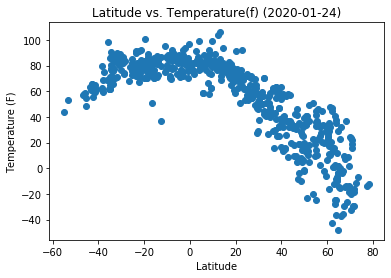

In [11]:
#Latitude vs. Temperature Plot
plt.scatter(df_countries['Latitude'], df_countries['Temperature (F)'])

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latitude vs. Temperature(f) (2020-01-24)')
plt.savefig("CityLatitudeVsTemperature.png")
#Notes and Observations
#Code is analyzing the relationship between temperature and latitude. In this case the 
#lower the latitude the higher the temps and the higher the latitude the lower the temps.
#Lower latitudes must be southern hemispher and #Higher the latitudes must be northern hemisphere

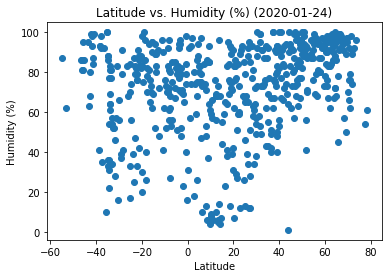

In [12]:
#Latitude vs. Humidity Plot
plt.scatter(df_countries['Latitude'], df_countries['Humidity (%)'])

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%) (2020-01-24)')
plt.savefig("CityLatitudeVsHumidity.png")

#Code is analyzing the relationship between temperature and humidity. In this case the 
#chart does not tell us very much - at any latitude humidity can exist

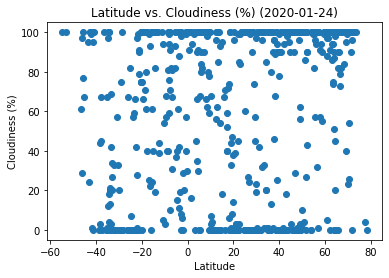

In [13]:
#Latitude vs. Cloudiness Plot

plt.scatter(df_countries['Latitude'], df_countries['Cloudiness (%)'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (%) (2020-01-24)')
plt.savefig("CityLatitudeVsCloudiness.png")

#Code is analyzing the relationship between temperature and cloudiness. In this case the 
#chart does not tell us very much - at any latitude cloudiness can vary

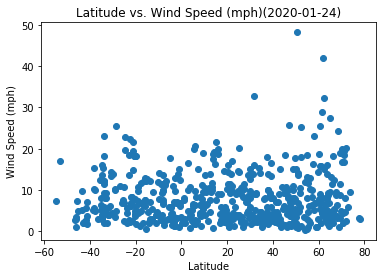

In [14]:
#Latitude vs. Wind Speed Plot
plt.scatter(df_countries['Latitude'], df_countries['Wind Speed (mph)'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph)(2020-01-24)')
plt.savefig("CityLatitudeVsWindSpeed.png")

#Code is analyzing the relationship between temperature and windspeed. In this case the 
#chart does not tell us very much - at any latitude windspeed usually stays below 10mph


In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [16]:
#Northern Hemisphere - Temp vs. Latitude Linear Regression
#Your next objective is to run linear regression on each relationship, 
#only this time separating them into Northern Hemisphere 
#greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

df_countries_North = df_countries[df_countries["Latitude"] >= 0]
df_countries_South = df_countries[df_countries["Latitude"] < 0]


The r-squared is : -0.88


(array([-60., -40., -20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 10 Text yticklabel objects>)

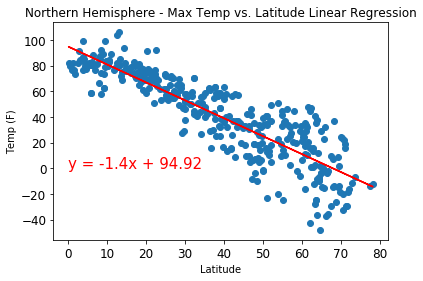

In [17]:
# Call an function #1
equation = linear_agression(df_countries_North["Latitude"], df_countries_North["Temperature (F)"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Temp (F)")

# Save the figure
plt.savefig("Northern Hemisphere - Temp vs. Latitude Linear Regression.png")

plt.xticks(size=12)
plt.yticks(size=12)

# The correlation coefficient is a statistical measure that calculates the strength of the relationship 
# between the relative movements of two variables. The values range between -1.0 and 1.0. 
# A calculated number greater than 1.0 or less than -1.0 means that there was an error in 
# the correlation measurement. A correlation of -1.0 shows a perfect negative correlation, while a 
# correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no relationship between
# the movement of the two variables.


The r-squared is : 0.52


(array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 9 Text yticklabel objects>)

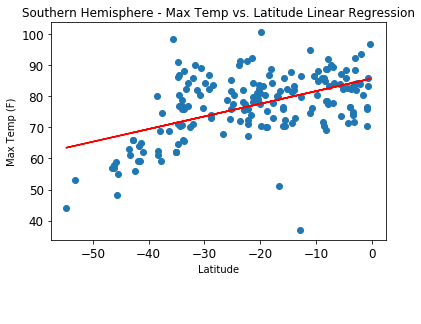

In [18]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# Call an function #1
equation = linear_agression(df_countries_South["Latitude"],df_countries_South["Temperature (F)"])

# Call an function #2
annotate(equation, -30, 10)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

plt.xticks(size=12)
plt.yticks(size=12)

The r-squared is : 0.45


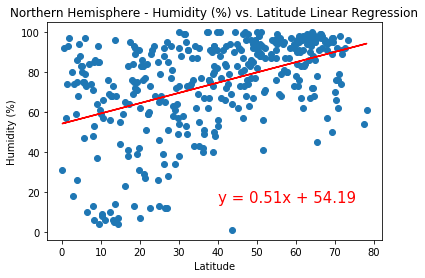

In [19]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Call an function #1
equation = linear_agression(df_countries_North["Latitude"], df_countries_North["Humidity (%)"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.01


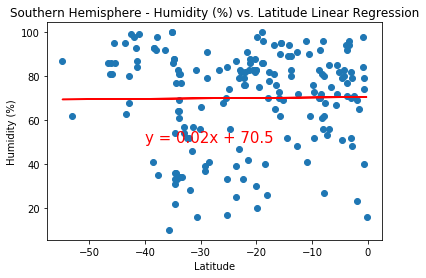

In [20]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Call an function #1
equation = linear_agression(df_countries_South["Latitude"], df_countries_South["Humidity (%)"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.2


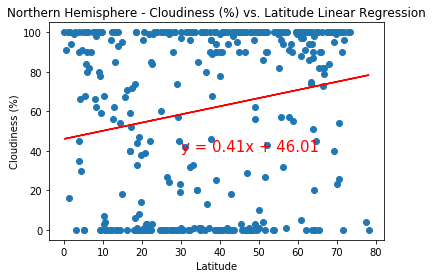

In [21]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

equation = linear_agression(df_countries_North["Latitude"], df_countries_North["Cloudiness (%)"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


The r-squared is : 0.16


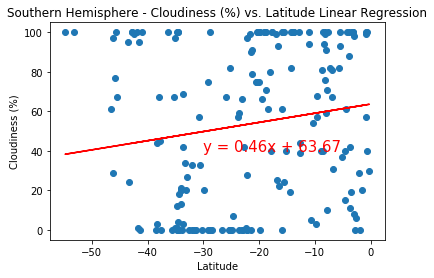

In [22]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


# Call an function #1
equation = linear_agression(df_countries_South["Latitude"], df_countries_South["Cloudiness (%)"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.09


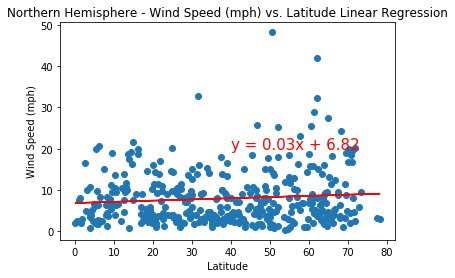

In [23]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Call an function #1
equation = linear_agression(df_countries_North["Latitude"], df_countries_North["Wind Speed (mph)"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-squared is : -0.03


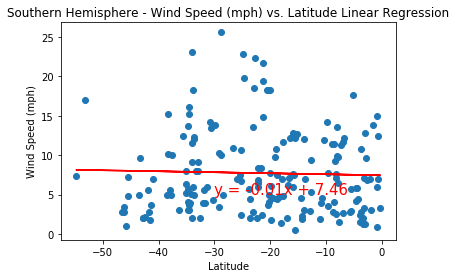

In [24]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Call an function #1
equation = linear_agression(df_countries_South["Latitude"], df_countries_South["Wind Speed (mph)"])

# Call an function #2
annotate(equation, -30, 5)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")